In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

#%matplotlib inline


(49920, 24)
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
Int64Index([  202,   203,   204,   205,   206,   207,   208,   209,   210,
              211,
            ...
            49910, 49911, 49912, 49913, 49914, 49915, 49916, 49917, 49918,
            49919],
           dtype='int64', length=41697)
(8223, 24)


C:\Users\AryaN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5931E1AC8>


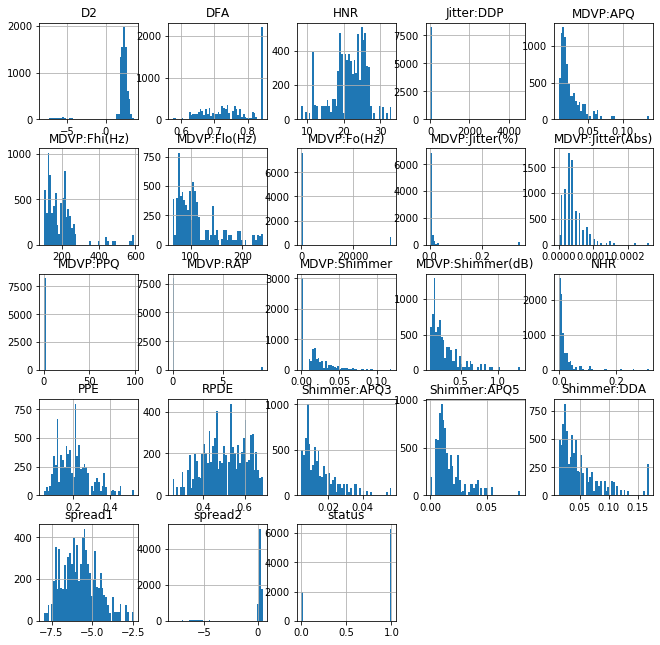

In [37]:
dis = pd.read_csv('C://Users//AryaN//OneDrive//Desktop//parkinsons.csv')
#print(dis) 
print(dis.shape)
tnull = dis.isnull().sum()
#tobsv = dis.shape(0)
#null_per = tnull[tnull>0]/tobsv*100
#tnull =  tnull[tnull>0] 
print(tnull) 
dupli = dis[dis.duplicated(keep = "first")].index 
print(dupli) 
dis.drop(dupli,axis=0,inplace=True)
dis[dis.duplicated(keep="first")]
print(dis.shape) 
fig,ax = plt.subplots(figsize=(11,11))
print(dis.hist(bins=50,ax=ax)) 

In [39]:
#Lets first drop the name column as it has no impact on the status
#print(dis) 
#dis.drop(columns ='name',inplace=True)
X = dis.drop('name',1)
y = dis['status']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
cols = X.columns
print(cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Let us scale training data set test data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(train_scaled)
X_test_scaled = pd.DataFrame(test_scaled)


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [40]:
cols = X.columns
print(cols)
# Replace the Columns Headers back
X_train_scaled.columns = cols
X_test_scaled.columns = cols
X_train_scaled.head()
#from sklearn.decomposition import PCA
#pca = PCA()
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)
numRows = X_train_scaled.count(axis=0)[0]
print("Total no. of rows in the training set: ", numRows)
numRows = X_test_scaled.count(axis=0)[0]
print("Total no. of rows in the testing set: ", numRows)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
Total no. of rows in the training set:  6578
Total no. of rows in the testing set:  1645


In [41]:
#KNN
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

[[ 381   21]
 [  21 1222]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       402
           1       0.98      0.98      0.98      1243

    accuracy                           0.97      1645
   macro avg       0.97      0.97      0.97      1645
weighted avg       0.97      0.97      0.97      1645

WITH K = 1


[[ 381   21]
 [  21 1222]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       402
           1       0.98      0.98      0.98      1243

    accuracy                           0.97      1645
   macro avg       0.97      0.97      0.97      1645
weighted avg       0.97      0.97      0.97      1645



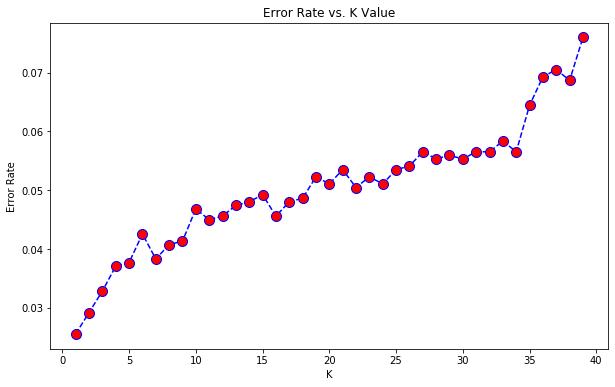

In [42]:
# Predictions and Evaluations
# Let's evaluate our KNN model !
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
 
print(classification_report(y_test, pred))
error_rate = []
 
# Will take some time
for i in range(1, 40):
     
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
 
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
 
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
 
print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

In [43]:
# NOW WITH K = 15
knn = KNeighborsClassifier(n_neighbors = 15)
 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
 
print('WITH K = 15')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
K = 4

NNH = KNeighborsClassifier(n_neighbors= K)

# Call Nearest Neighbour algorithm
NNH.fit(X_train_scaled, y_train)
KNN_predicted_labels = NNH.predict(X_train_scaled)
train_acc = metrics.accuracy_score(y_train, KNN_predicted_labels)
print("Model Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, KNN_predicted_labels)*100))
print()

KNN_predicted_labels = NNH.predict(X_test_scaled)
test_acc = metrics.accuracy_score(y_test, KNN_predicted_labels)
print("Model Accuracy with Testing Data: {0:.4f}".format(metrics.accuracy_score(y_test, KNN_predicted_labels)*100))
print()

WITH K = 15


[[ 347   55]
 [  26 1217]]


              precision    recall  f1-score   support

           0       0.93      0.86      0.90       402
           1       0.96      0.98      0.97      1243

    accuracy                           0.95      1645
   macro avg       0.94      0.92      0.93      1645
weighted avg       0.95      0.95      0.95      1645

Model Accuracy with Training Data: 100.0000

Model Accuracy with Testing Data: 100.0000



In [44]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train_scaled, y_train)
GNB_predicted_labels = GNB.predict(X_train_scaled)

print("Model Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, GNB_predicted_labels)*100))
print()

GNB_predicted_labels = GNB.predict(X_test_scaled)

print("Model Accuracy with Testing data: {0:.4f}".format(metrics.accuracy_score(y_test, GNB_predicted_labels)*100))
print()

Model Accuracy with Training Data: 100.0000

Model Accuracy with Testing data: 100.0000



In [45]:
#DECISION_TREE
# Function to perform training with giniIndex.
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [46]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [47]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[1 1 1 ... 1 0 1]
Confusion Matrix:  [[ 402    0]
 [   0 1243]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00      1243

    accuracy                           1.00      1645
   macro avg       1.00      1.00      1.00      1645
weighted avg       1.00      1.00      1.00      1645

Results Using Entropy:
Predicted values:
[1 1 1 ... 1 0 1]
Confusion Matrix:  [[ 402    0]
 [   0 1243]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00      1243

    accuracy                           1.00      1645
   macro avg       1.00      1.00      1.00      1645
weighted avg       1.00      1.00      1.00      1645

